In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score

In [81]:
df=pd.read_csv(r"C:\Users\rakes\OneDrive\Desktop\course stuff\deep_learning\IRIS.csv")

In [82]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [83]:
spe=[]
for i in df['species']:
    if i=='Iris-setosa':
        spe.append(0)
    elif i=='Iris-versicolor':
        spe.append(1)
    elif i=='Iris-virginica':
        spe.append(2)
df['species']=spe

In [84]:
X = df.iloc[:,:4]
y = df['species']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 0)

In [85]:
knn=KNeighborsClassifier()

In [86]:
param_to_be_tuned={'n_neighbors':[i for i in range(3,29,2)]} #tuning parameters grid

### *GridSearchCV using sklearn*

In [87]:
clf = GridSearchCV(
    estimator=KNeighborsClassifier(), 
    param_grid=param_to_be_tuned, 
    scoring='accuracy',
    cv=3,
    return_train_score=True,
    verbose=1
)

In [88]:
clf.fit(X_train,y_train)

Fitting 3 folds for each of 13 candidates, totalling 39 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [89]:
print(clf.best_params_)

{'n_neighbors': 7}


In [90]:
cv_results=pd.DataFrame(clf.cv_results_)

In [91]:
cv_results[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'n_neighbors': 3},0.950000,0.941667
1,{'n_neighbors': 5},0.966667,0.958333
2,{'n_neighbors': 7},0.966667,0.966667
3,{'n_neighbors': 9},0.966667,0.966667
4,{'n_neighbors': 11},0.966667,0.958333
5,{'n_neighbors': 13},0.954167,0.958333
6,{'n_neighbors': 15},0.941667,0.941667
7,{'n_neighbors': 17},0.937500,0.941667
8,{'n_neighbors': 19},0.950000,0.933333
9,{'n_neighbors': 21},0.937500,0.941667


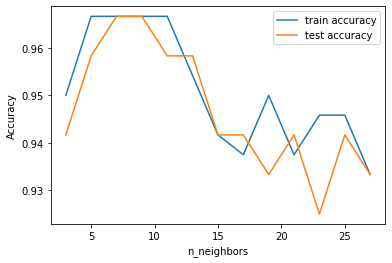

In [92]:
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_train_score'])
plt.plot(cv_results['param_n_neighbors'], cv_results['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

### *GridsearchCV manual implementation*

In [93]:
param_to_be_tuned={'n_neighbors':[i for i in range(3,29,2)]} #tuning parameters grid

In [94]:
import random

In [95]:
X = df.iloc[:,:4].values
y = df['species'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, 
                                                    random_state = 0)

In [96]:
def select_60_per_indices_randomly(x_train):
    return random.sample([i for i in range(len(x_train))],int(0.6*(len(x_train)))) #sampling 60% data

In [97]:
def grid_search(x_train,y_train,hyperparameter,folds,estimator):
    train_score=[]
    test_score=[]
    for k in hyperparameter['n_neighbors']:
        estimator.n_neighbors=k
        train_acc_per_each_fold=[]
        test_acc_per_each_fold=[]
        for fold in range(folds):
            train_indices=select_60_per_indices_randomly(x_train) #randomly selecting 60% indices
            cv_indices=list(set([i for i in range(len(x_train))])-set(train_indices)) #storing the rest indices in cv set
            X_train_1=X_train[train_indices] #restoring the X_train values for cross_validation from the indices we already obtained.
            y_train_1=y_train[train_indices] #restoring the y_train values for cross_validation from the indices we already obtained.
            X_cv=X_train[cv_indices] #restoring X_cv values from the indices we had
            y_cv=y_train[cv_indices] #restoring the y_cv values from the indices we had
            estimator.fit(X_train_1,y_train_1)
            y_cv_predict=estimator.predict(X_cv)
            y_train_pred=estimator.predict(X_train_1)
            # after prediction of both CV and train storing both the accuracies for every fold.
            test_acc_per_each_fold.append(accuracy_score(y_cv_predict,y_cv))
            train_acc_per_each_fold.append(accuracy_score(y_train_pred,y_train_1))
        # storing the mean accuracies of each fold.
        train_score.append(np.mean(np.array(train_acc_per_each_fold)))
        test_score.append(np.mean(np.array(test_acc_per_each_fold)))
    return train_score,test_score

In [98]:
trains,tests=grid_search(X_train,y_train,param_to_be_tuned,3,KNeighborsClassifier())

In [99]:
cv_res=pd.DataFrame()

In [100]:
cv_res['params']=param_to_be_tuned['n_neighbors']

In [101]:
cv_res['mean_train_score']=trains

In [102]:
cv_res['mean_test_score']=tests

In [103]:
cv_res['diff']=cv_res['mean_train_score']-cv_res['mean_test_score']

In [104]:
cv_res

,params,mean_train_score,mean_test_score,diff
0,3,0.921296,0.979167,-0.057870
1,5,0.972222,0.958333,0.013889
2,7,0.962963,0.972222,-0.009259
3,9,0.962963,0.965278,-0.002315
4,11,0.958333,0.937500,0.020833
5,13,0.958333,0.944444,0.013889
6,15,0.939815,0.930556,0.009259
7,17,0.958333,0.923611,0.034722
8,19,0.944444,0.944444,0.000000
9,21,0.939815,0.944444,-0.004630


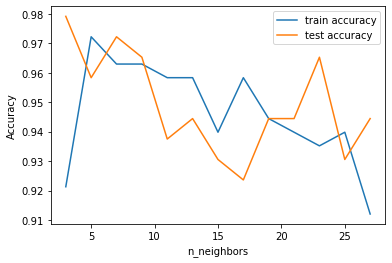

In [105]:
plt.plot(cv_res['params'], cv_res['mean_train_score'])
plt.plot(cv_res['params'], cv_res['mean_test_score'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

## *So, our best hyperparameter is k=19 from both the graphs*

In [106]:
knn.n_neighbors=19

In [107]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=19)

In [108]:
y_test_predict=knn.predict(X_test)

In [109]:
accuracy_score(y_test_predict,y_test)

1.0

###  *as we trained, cross-validated our data and tuned the hyperparameter now we can test on test data and claim that our model is 100% accurate on future query points*

$$$____________________________________________$$$____________________________________$$$

## *RandomsearchCV using sklearn*

In [110]:
param_to_be_tuned={'n_neighbors':[i for i in range(3,29,2)]}

In [111]:
knn=KNeighborsClassifier()

In [112]:
rcv=RandomizedSearchCV(estimator=knn,param_distributions=param_to_be_tuned,return_train_score=True)

In [113]:
rcv.fit(X_train,y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': [3, 5, 7, 9, 11, 13, 15,
                                                        17, 19, 21, 23, 25,
                                                        27]},
                   return_train_score=True)

In [114]:
print(rcv.best_params_)

{'n_neighbors': 13}


In [115]:
rcv_df=pd.DataFrame(rcv.cv_results_)

In [116]:
rcv_df[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'n_neighbors': 17},0.947917,0.941667
1,{'n_neighbors': 27},0.943750,0.933333
2,{'n_neighbors': 7},0.962500,0.950000
3,{'n_neighbors': 19},0.947917,0.941667
4,{'n_neighbors': 23},0.941667,0.950000
5,{'n_neighbors': 5},0.962500,0.933333
6,{'n_neighbors': 25},0.943750,0.925000
7,{'n_neighbors': 13},0.962500,0.958333
8,{'n_neighbors': 15},0.954167,0.958333
9,{'n_neighbors': 21},0.943750,0.941667


In [117]:
knn.n_neighbors=13

In [118]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [119]:
y_pred_rcv=knn.predict(X_test)

In [120]:
accuracy_score(y_pred_rcv,y_test)

1.0

## *RandomsearchCV manual implementation*

In [121]:
param_to_be_tuned={'n_neighbors':[i for i in range(3,29,2)]}

In [122]:
param_to_be_tuned['n_neighbors']

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]

In [123]:
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    params=random.sample(param_range['n_neighbors'],10)
    params.sort()
    
    fold_indices=[]
    for i in range(0,len(X_train),int(len(X_train)/folds)):
        j=i+int(len(X_train)/folds)                           # in this code block divided the train set indices into folds
        fold_indices.append([k for k in range(i,j)])
        
    total_indices=[index for index in range(len(X_train))]  # created a list of all the indices
    train_acc=[]
    test_acc=[]
    for neigh in params:    
        classifier.n_neighbors=neigh
        train_acc_per_fold=[]
        test_acc_per_fold=[]
        for fold in fold_indices:
            X_train_1=x_train[list(set(total_indices)-set(fold))]  # except for the fold all are stored in X_train
            y_train_1=y_train[list(set(total_indices)-set(fold))]
            X_cv=x_train[list(set(fold))] # fold is our X_cv
            y_cv=y_train[list(set(fold))]
            classifier.fit(X_train_1,y_train_1)
            y_test_pred=classifier.predict(X_cv)
            y_train_pred=classifier.predict(X_train_1)
            test_acc_per_fold.append(accuracy_score(y_test_pred,y_cv)) # appending all the test accuracies into a list
            train_acc_per_fold.append(accuracy_score(y_train_pred,y_train_1)) # ||ly for train accuracies
        train_acc.append(np.mean(np.array(train_acc_per_fold)))
        test_acc.append(np.mean(np.array(test_acc_per_fold)))
    return(train_acc,test_acc,params)
        
    

In [124]:
tr,ts,p=RandomSearchCV(X_train,y_train,knn,param_to_be_tuned,3)

In [125]:
rcv=pd.DataFrame()

In [126]:
rcv['train_acc']=tr

In [127]:
rcv['test_acc']=ts

In [128]:
rcv['params']=p

In [129]:
rcv['diff']=rcv['train_acc']-rcv['test_acc']

In [130]:
rcv

,train_acc,test_acc,params,diff
0,0.950000,0.941667,3,0.008333
1,0.966667,0.950000,5,0.016667
2,0.962500,0.958333,7,0.004167
3,0.962500,0.966667,9,-0.004167
4,0.962500,0.966667,11,-0.004167
5,0.954167,0.958333,13,-0.004167
6,0.945833,0.941667,15,0.004167
7,0.945833,0.933333,17,0.012500
8,0.941667,0.925000,21,0.016667
9,0.941667,0.933333,25,0.008333


In [132]:
sorted(rcv['diff'].unique())

[-0.004166666666666763,
 -0.004166666666666652,
 0.004166666666666541,
 0.004166666666666652,
 0.008333333333333082,
 0.008333333333333526,
 0.012500000000000178,
 0.016666666666666607,
 0.01666666666666683]

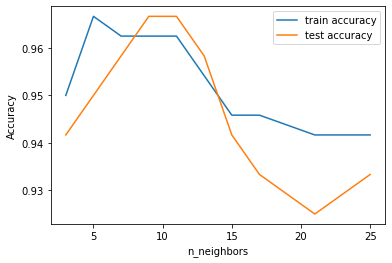

In [131]:
plt.plot(rcv['params'], rcv['train_acc'])
plt.plot(rcv['params'], rcv['test_acc'])
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.legend(['train accuracy', 'test accuracy'], loc='upper right')

In [133]:
knn.n_neighbors=15

In [134]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [135]:
y_test_predict=knn.predict(X_test)

In [136]:
accuracy_score(y_test,y_test_predict)

1.0